In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 


In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

SELECTING DATA COLUMNS

In [4]:
df_model = df[['avg_salary', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len']]

GET DUMMY DATA

In [5]:
df_dum = pd.get_dummies(df_model)

TRAIN AND TEST SPLIT

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X=df_dum.drop('avg_salary', axis=1)

In [9]:
Y = df_dum.avg_salary.values

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

LINEAR REGRESSION

In [11]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(lm,X_train,Y_train,scoring='neg_mean_absolute_error', cv=3)

array([-3.83725460e-04, -6.57816737e-06, -1.48546725e-06])

In [17]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lm,X_train,Y_train,scoring='neg_mean_absolute_error', cv=3))

-0.00013059636499033824

LASSO REGRESSION

In [19]:
from sklearn.linear_model import Lasso

In [ ]:
lm_l = Lasso(aplha=.13)

In [ ]:
lm_l.fit(X_train,Y_train)

In [21]:
np.mean(cross_val_score(lm_l,X_train,Y_train,scoring='neg_mean_absolute_error', cv=3))

-0.025997455463735258

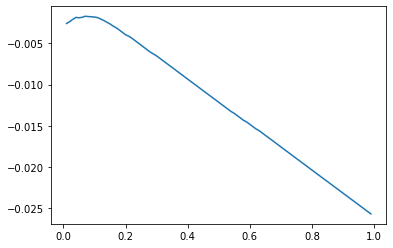

In [25]:
alpha=[]
error=[]
for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,Y_train,scoring='neg_mean_absolute_error', cv=3)))
plt.plot(alpha,error)

In [26]:
err = tuple(zip(alpha,error))


In [27]:
df_err = pd.DataFrame(err, columns = ['aplha', 'error'])

In [28]:
df_err[df_err.error == max(df_err.error)]

,aplha,error
6,0.07,-0.001706


RANDOM FOREST

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf = RandomForestRegressor()

In [32]:
np.mean(cross_val_score(rf,X_train,Y_train,scoring='neg_mean_absolute_error', cv=3))

-1.2314704148079783

In [ ]:
#TUNE MODELS GRIDSEARCHCV
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
gs=GridSearchCV(rf, parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,Y_train)

In [ ]:
gs.best_score

In [ ]:
gs.best_estimator_

TEST ENSEMBLES

In [ ]:
tpred_lm = lm.predict(X_test)

In [ ]:
tpred_lml = lm_l.predict(X_test)

In [ ]:
tpred_rf = gs.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test,tpred_lm)

In [ ]:
mean_absolute_error(y_test,tpred_lml)

In [ ]:
mean_absolute_error(y_test,tpred_rf)

In [ ]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)